### **Lab 04: Data Preprocessing**

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


The following code cell installs additional dependencies required to run the Jupyter Notebooks used in this class.

In [ ]:
# Add additional Python packages that we will be using in class
!apt install graphviz build-essential checkinstall imagemagick
# Base Python packages to run example Jupyter Notebooks
!pip install watermark pyprind mlxtend
# Python packages to visualize Decision Tree Classifiers
!pip install pydotplus graphviz pyparsing
# Python packages for Natrual Language Processing
!pip install nltk
# Python packages for Flask-based web applications
!pip install flask wtforms
# Python packages for TensorFlowdf.select_dtypes(include=['int64','float64']).columns
!pip install tensorflow tensorflow-datasets

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
checkinstall is already the newest version (1.6.2-4ubuntu2).
graphviz is already the newest version (2.40.1-2).
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.11).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


The following code cell defines a variable equal to the location inside your Google Drive where you copied the ch03 folder

In [ ]:
##### TODO CHANGE THIS TO THE PATH IN GOOGLE DRIVE WHERE YOU COPIED THE ch03 FOLDER #####
google_drive_root='/Colab Notebooks/ch04'

In [ ]:
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'

The following code cell mounts your Google Drive into the runtime of the workbook, so that you can access files.

In [ ]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


In [ ]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Sebastian Raschka

Last updated: 2021-10-23

numpy     : 1.19.5
pandas    : 1.1.5
matplotlib: 3.2.2
sklearn   : 0.0



In [ ]:
!pip install seaborn
!pip install sklearn

In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns

# **1. Data Collection**

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# **2. Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [ ]:
df = df.replace({'?':np.nan})

In [ ]:
df.isnull().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [ ]:
len(df)

653

In [ ]:
(1-(len(df)/690))*100

5.3623188405797055

Without knowing more about the features, it is impossible to impute the missing values let alone being a worthwhile use of our time. We only lost 5% of the data. This is acceptable. 

In [ ]:
nums = df.select_dtypes(include=['int64','float64']).columns
print(nums)

Int64Index([2, 7, 10, 14], dtype='int64')


In [ ]:
num_df = df[[2, 7, 10, 14]]

Saving the numerical features to num_df to scale and concatenate.

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [ ]:
df_dummies.head()

,2,7,10,14,0_b,1_15.17,1_15.75,1_15.83,1_15.92,1_16.00,1_16.08,1_16.17,1_16.25,1_16.33,1_16.50,1_16.92,1_17.08,1_17.25,1_17.33,1_17.42,1_17.50,1_17.58,1_17.67,1_17.83,1_17.92,1_18.00,1_18.08,1_18.17,1_18.25,1_18.33,1_18.42,1_18.50,1_18.58,1_18.67,1_18.83,1_18.92,1_19.00,1_19.17,1_19.33,1_19.42,...,13_00399,13_00400,13_00408,13_00410,13_00416,13_00420,13_00422,13_00431,13_00432,13_00434,13_00440,13_00443,13_00450,13_00454,13_00455,13_00460,13_00465,13_00470,13_00480,13_00487,13_00491,13_00500,13_00510,13_00515,13_00519,13_00520,13_00523,13_00550,13_00560,13_00583,13_00600,13_00640,13_00680,13_00711,13_00720,13_00760,13_00840,13_00980,13_02000,15_-
0,0.000,1.25,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.460,3.04,6,560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.500,1.50,0,824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.540,3.75,5,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.625,1.71,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_nums_std = sc.fit_transform(num_df)

## Note: the above line will produce df_nums_std as a numpy array instead of a Pandas Dataframe. SKLearn operates only on Pandas dfs

df_nums_std = pd.DataFrame(sc.fit_transform(num_df), columns=num_df.columns, index=num_df.index)

Scaled just the numerical features. Now to drop the unscaled versions of the same features in the main dataframe, df_dummies and replace them with the scaled versions.

In [ ]:
df_dummies = df_dummies.drop([2, 7, 10, 14], axis=1)

In [ ]:
df_dummies = pd.concat([df_dummies,df_nums_std], axis=1)

In [ ]:
df_dummies.head()

,0_b,1_15.17,1_15.75,1_15.83,1_15.92,1_16.00,1_16.08,1_16.17,1_16.25,1_16.33,1_16.50,1_16.92,1_17.08,1_17.25,1_17.33,1_17.42,1_17.50,1_17.58,1_17.67,1_17.83,1_17.92,1_18.00,1_18.08,1_18.17,1_18.25,1_18.33,1_18.42,1_18.50,1_18.58,1_18.67,1_18.83,1_18.92,1_19.00,1_19.17,1_19.33,1_19.42,1_19.50,1_19.58,1_19.67,1_19.75,...,13_00416,13_00420,13_00422,13_00431,13_00432,13_00434,13_00440,13_00443,13_00450,13_00454,13_00455,13_00460,13_00465,13_00470,13_00480,13_00487,13_00491,13_00500,13_00510,13_00515,13_00519,13_00520,13_00523,13_00550,13_00560,13_00583,13_00600,13_00640,13_00680,13_00711,13_00720,13_00760,13_00840,13_00980,13_02000,15_-,2,7,10,14
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.961440,-0.295171,-0.302596,-0.193125
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.073565,0.236217,0.704516,-0.086443
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.861903,-0.220955,-0.504019,-0.036150
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.654865,0.446990,0.503093,-0.192553
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.158358,-0.158613,-0.504019,-0.193125


In [ ]:
X = df_dummies.drop('15_-', axis=1)
y = df_dummies['15_-'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# **3. Feature Selection**

 1) 9_t                            0.201350
 2) 10                             0.082139
 3) 7                              0.078304
 4) 14                             0.069613
 5) 2                              0.059514
 6) 11_t                           0.052571
 7) 6_j                            0.012794
 8) 12_p                           0.011168
 9) 6_dd                           0.010341
10) 5_c                            0.009723
11) 1_15.17                        0.009257
12) 6_z                            0.009016
13) 5_r                            0.008744
14) 6_h                            0.008349
15) 3_y                            0.008119
16) 5_i                            0.008037
17) 4_gg                           0.007998
18) 5_d                            0.007681
19) 5_j                            0.007479
20) 5_cc                           0.006920
21) 13_00017                       0.006820
22) 5_m                            0.006819
23) 5_x                         

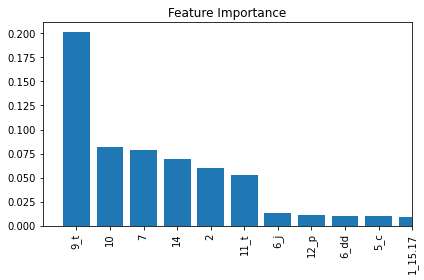

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_dummies.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X,y)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, 10])
plt.tight_layout()
#plt.savefig(google_file_prefix + 'images/04_09.png', dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.05, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 6


In [ ]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) 9_t                            0.201350
 2) 10                             0.082139
 3) 7                              0.078304
 4) 14                             0.069613
 5) 2                              0.059514
 6) 11_t                           0.052571


1 - 5 are our top 5 features that we will be comparing with the full dataset.

In [ ]:
k_score = []
for K in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=K, 
                           p=2, 
                           metric='minkowski')
  knn.fit(X_train, y_train)
  k_score = np.append(k_score, knn.score(X_test,y_test))
  print('K =', K, ' - ', knn.score(X_test,y_test))

K = 1  -  0.8061224489795918
K = 2  -  0.7959183673469388
K = 3  -  0.8469387755102041
K = 4  -  0.8571428571428571
K = 5  -  0.8622448979591837
K = 6  -  0.8571428571428571
K = 7  -  0.8571428571428571
K = 8  -  0.8571428571428571
K = 9  -  0.8571428571428571


In [ ]:
k_values = list(range(1,10))

Text(0, 0.5, 'Accuracy')

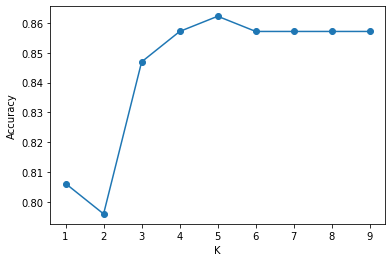

In [ ]:
plt.plot(k_values,k_score, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')

K = 5 gives the best score here at 0.862. Let's see if we can do better by training the model on only the top 5 features.

In [ ]:
X_top5 = df_dummies[['9_t',10,7,14,2,'11_t','15_-']]
y_top5 = df_dummies['15_-'].values

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_top5, y_top5, test_size=0.3, random_state=1, stratify=y)

In [ ]:
k5_score = []
for K in range(1,10):
  knn_top5 = KNeighborsClassifier(n_neighbors=K, 
                           p=2, 
                           metric='minkowski')
  knn_top5.fit(X_train2, y_train2)
  k5_score = np.append(k5_score, knn_top5.score(X_test2,y_test2))
  print('K =', K, ' - ', knn_top5.score(X_test2,y_test2))

K = 1  -  0.9795918367346939
K = 2  -  0.9795918367346939
K = 3  -  0.9897959183673469
K = 4  -  0.9693877551020408
K = 5  -  0.9744897959183674
K = 6  -  0.9693877551020408
K = 7  -  0.9744897959183674
K = 8  -  0.9744897959183674
K = 9  -  0.9795918367346939


Text(0, 0.5, 'Accuracy')

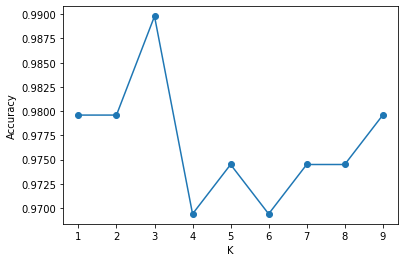

In [ ]:
plt.plot(k_values,k5_score, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')

-0.33333333333333337

In [ ]:
0.989/0.862 - 1

0.14733178654292334

K = 3 gives the best score of 0.989, but note the range of the Y-axis. They are all quite close to 100% accuracy regardless.

# **Summary**
Training the KNN classifier on just the top 5 yielded a a 14.7% increase in accuracy. This makes sense as including the full data from the 6th most important feature onward had an importance of less than 5% which caused the model to overfit to the data.